Name of Project :- Stock Market Prediction

In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nifty50-stock-market-data/CIPLA.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/NESTLEIND.csv
/kaggle/input/nifty50-stock-market-data/ONGC.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/UPL.csv
/kaggle/input/nifty50-stock-market-data/DRREDDY.csv
/kaggle/input/nifty50-stock-market-data/TATASTEEL.csv
/kaggle/input/nifty50-stock-market-data/EICHERMOT.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/BHARTIARTL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/ICICIBANK.csv
/kaggle/input/nifty50-stock-market-data/VEDL.csv
/kaggle/input/nifty50-stock-market-data/ASIANPAINT.csv
/kaggle/input/nifty50-stock-market-data/NIFTY50_all.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/KOTAKBANK.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nift

In [2]:
df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/DRREDDY.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,13280,2.002904e+12,NaN,NaN,NaN
1,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,57142,9.024405e+12,NaN,NaN,NaN
2,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,119697,1.909155e+13,NaN,NaN,NaN
3,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,121966,1.990625e+13,NaN,NaN,NaN
4,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,79641,1.262497e+13,NaN,NaN,NaN


In [3]:
data = df[['Date','Open','High','Low','Close','Volume','VWAP']]

In [4]:
df.set_index("Date", drop=False, inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Volume,VWAP
0,2000-01-03,1505.00,1508.25,1505.00,1508.25,13280,1508.21
1,2000-01-04,1590.00,1628.95,1510.00,1628.95,57142,1579.29
2,2000-01-05,1549.00,1650.00,1499.00,1568.05,119697,1594.99
3,2000-01-06,1599.00,1693.50,1571.00,1661.55,121966,1632.11
4,2000-01-07,1685.00,1685.00,1528.65,1529.10,79641,1585.24
...,...,...,...,...,...,...,...
5054,2020-04-24,4010.00,4049.60,3970.10,4002.80,1266284,4005.08
5055,2020-04-27,4002.80,4065.10,3955.05,3980.30,1124910,3994.42
5056,2020-04-28,4030.00,4036.20,3892.05,3949.75,861168,3940.58
5057,2020-04-29,3949.75,3970.00,3872.55,3880.70,1039646,3898.07


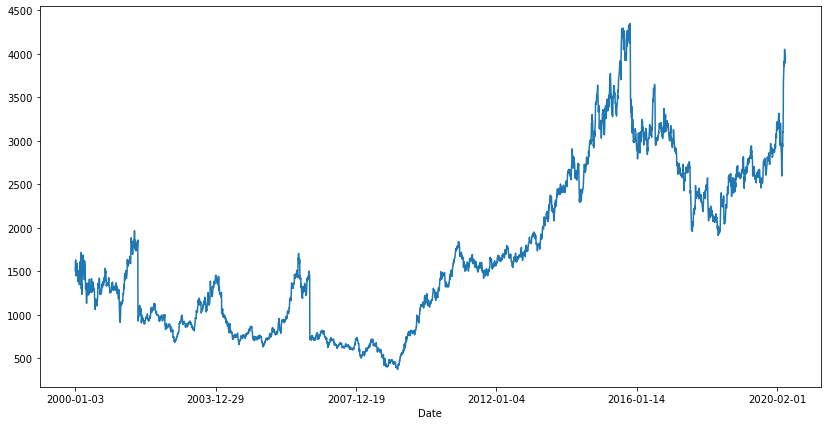

In [6]:
df.VWAP.plot(figsize=(14, 7))

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5059 entries, 0 to 5058
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5059 non-null   object 
 1   Open    5059 non-null   float64
 2   High    5059 non-null   float64
 3   Low     5059 non-null   float64
 4   Close   5059 non-null   float64
 5   Volume  5059 non-null   int64  
 6   VWAP    5059 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 276.8+ KB


In [8]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,...,7.170468e+13,2.970083e+13,3.717132e+13,4.663662e+13,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711
2000-01-04,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,...,2.002904e+12,2.970083e+13,3.717132e+13,4.663662e+13,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711
2000-01-05,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,...,5.513655e+12,4.964951e+12,4.964951e+12,4.964951e+12,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711
2000-01-06,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,...,1.003962e+13,8.589440e+12,8.589440e+12,8.589440e+12,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711
2000-01-07,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,...,1.250628e+13,6.061156e+12,8.574569e+12,8.574569e+12,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711


In [9]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.set_index('Date',inplace=True)
data.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,VWAP
Date,,,,,,
2000-01-03,1505.0,1508.25,1505.00,1508.25,13280,1508.21
2000-01-04,1590.0,1628.95,1510.00,1628.95,57142,1579.29
2000-01-05,1549.0,1650.00,1499.00,1568.05,119697,1594.99
2000-01-06,1599.0,1693.50,1571.00,1661.55,121966,1632.11
2000-01-07,1685.0,1685.00,1528.65,1529.10,79641,1585.24


In [10]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,DRREDDY,EQ,1396.50,1505.0,1508.25,1505.00,1508.25,1508.25,1508.21,...,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711,1,1,3,0
2000-01-04,2000-01-04,DRREDDY,EQ,1508.25,1590.0,1628.95,1510.00,1628.95,1628.95,1579.29,...,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711,1,1,4,1
2000-01-05,2000-01-05,DRREDDY,EQ,1628.95,1549.0,1650.00,1499.00,1566.00,1568.05,1594.99,...,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711,1,1,5,2
2000-01-06,2000-01-06,DRREDDY,EQ,1568.05,1599.0,1693.50,1571.00,1693.50,1661.55,1632.11,...,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711,1,1,6,3
2000-01-07,2000-01-07,DRREDDY,EQ,1661.55,1685.0,1685.00,1528.65,1528.65,1529.10,1585.24,...,30996.226562,30935.513672,30409.0,10790.273438,13066.061523,15955.178711,1,1,7,4


In [11]:
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [12]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 2.8 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
import lightgbm as lgb
import numpy as np
import pandas as pd

from fbprophet import Prophet
from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 37
seed = myfavouritenumber
np.random.seed(seed)

In [14]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(0,0,0,0) [intercept=True]; AIC=48086.113, BIC=48344.597, Time=16.369 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=50141.590, BIC=50374.226, Time=8.608 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=48489.739, BIC=48728.837, Time=8.903 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=48688.257, BIC=48927.355, Time=12.090 seconds
Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=False]; AIC=85451.267, BIC=85677.441, Time=8.590 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=48150.229, BIC=48402.251, Time=14.670 seconds
Fit ARIMA(2,0,1)x(0,0,0,0) [intercept=True]; AIC=48096.311, BIC=48348.333, Time=14.503 seconds
Fit ARIMA(3,0,2)x(0,0,0,0) [intercept=True]; AIC=48088.009, BIC=48352.955, Time=15.566 seconds
Fit ARIMA(2,0,3)x(0,0,0,0) [intercept=True]; AIC=48083.053, BIC=48347.999, Time=16.820 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=48106.689, BIC=48365.173, Time=15.926 seconds
Fit ARIMA

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


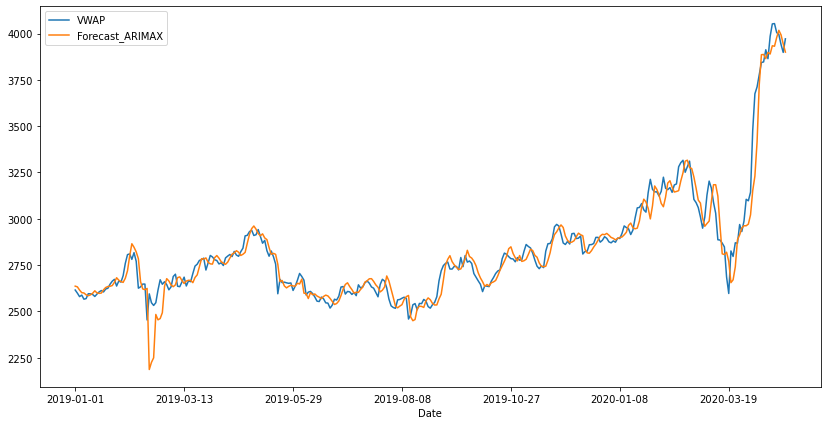

In [15]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [16]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 76.22223975569001

MAE of Auto ARIMAX: 49.17523854455283


In [17]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)

model_fbp.fit(df_train[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds", "VWAP": "y"}))

forecast = model_fbp.predict(df_valid[["Date", "VWAP"] + exogenous_features].rename(columns={"Date": "ds"}))
df_valid["Forecast_Prophet"] = forecast.yhat.values

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


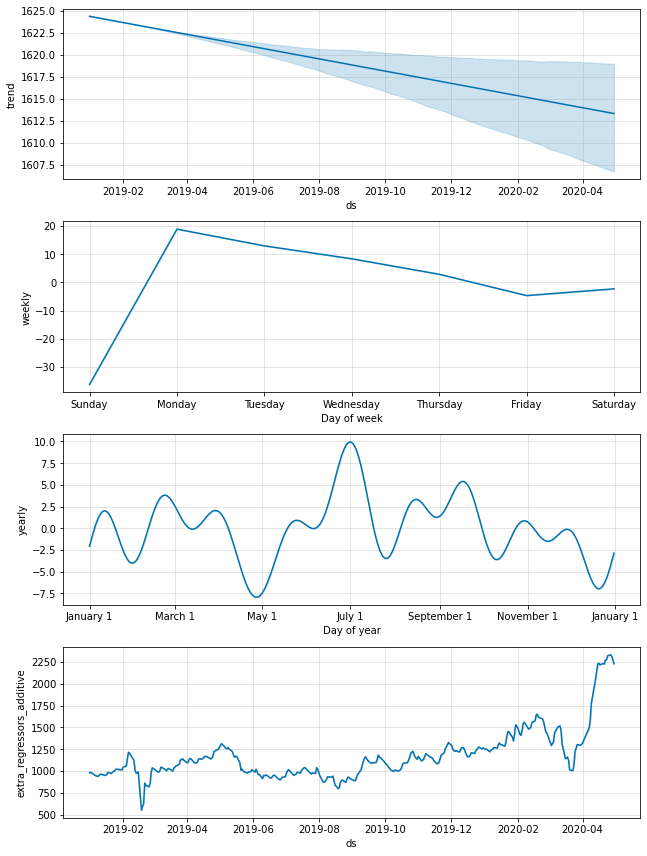

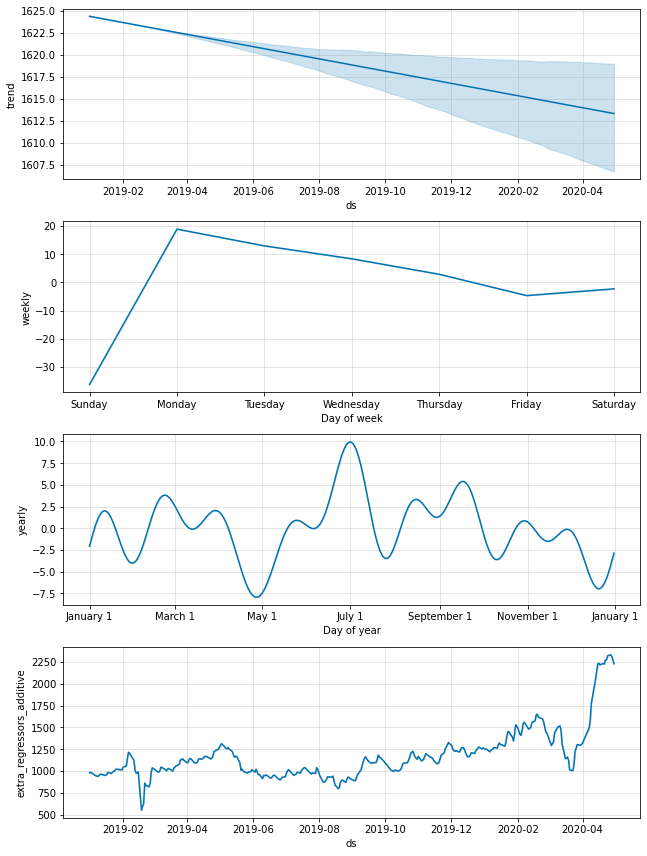

In [18]:
model_fbp.plot_components(forecast)

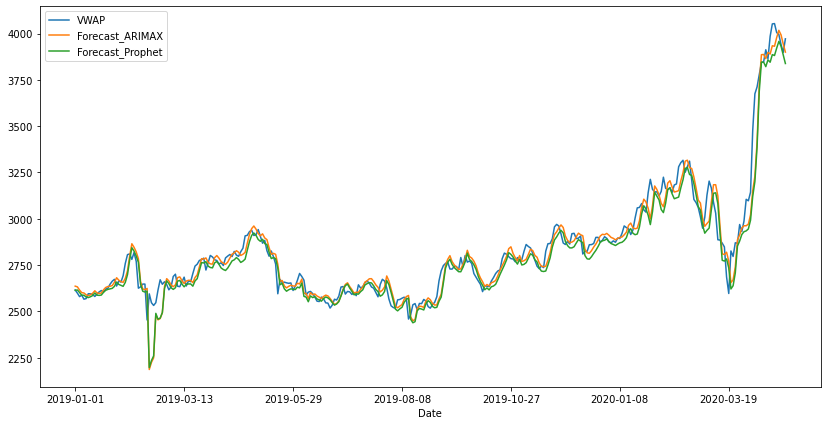

In [19]:
df_valid[["VWAP", "Forecast_ARIMAX", "Forecast_Prophet"]].plot(figsize=(14, 7))

In [20]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("RMSE of Prophet:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_Prophet)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))
print("MAE of Prophet:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_Prophet))

RMSE of Auto ARIMAX: 76.22223975569001
RMSE of Prophet: 82.37153873229381

MAE of Auto ARIMAX: 49.17523854455283
MAE of Prophet: 53.70403722034071


In [21]:
params = {"objective": "regression"}

dtrain = lgb.Dataset(df_train[exogenous_features], label=df_train.VWAP.values)
dvalid = lgb.Dataset(df_valid[exogenous_features])

model_lgb = lgb.train(params, train_set=dtrain)

forecast = model_lgb.predict(df_valid[exogenous_features])
df_valid["Forecast_LightGBM"] = forecast

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


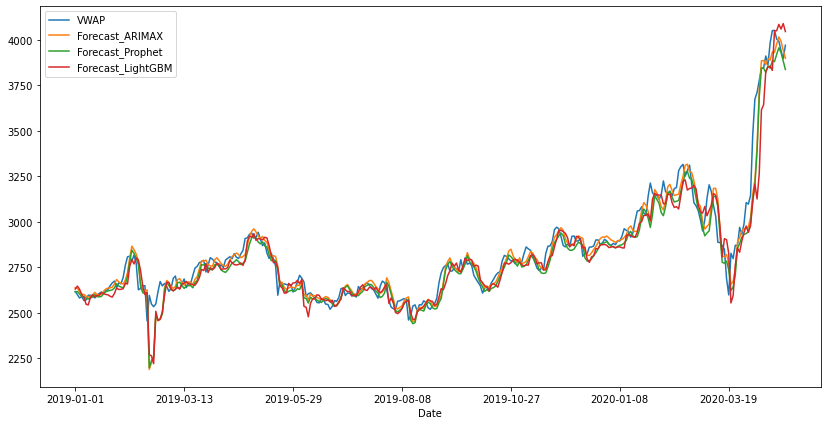

In [22]:
df_valid[["VWAP", "Forecast_ARIMAX", "Forecast_Prophet", "Forecast_LightGBM"]].plot(figsize=(14, 7))

In [23]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("RMSE of Prophet:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_Prophet)))
print("RMSE of LightGBM:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_LightGBM)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))
print("MAE of Prophet:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_Prophet))
print("MAE of LightGBM:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_LightGBM))

RMSE of Auto ARIMAX: 76.22223975569001
RMSE of Prophet: 82.37153873229381
RMSE of LightGBM: 94.01665099767199

MAE of Auto ARIMAX: 49.17523854455283
MAE of Prophet: 53.70403722034071
MAE of LightGBM: 59.26796244932571


In [24]:
#Thanks Vopani for your Kernal, explored some nice Concepts.